In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

In [21]:
df_DE = df_DE.dropna(subset=['salary_year_avg'])

In [22]:
mean_salary = df_DE['salary_year_avg'].mean()

In [23]:
median_salary = df_DE['salary_year_avg'].median()

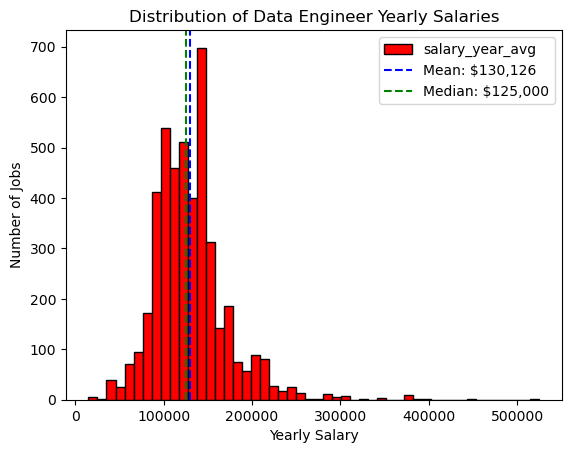

In [25]:
df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()